
# 🗓Section 21-22: Hypothesis A/B Testing

- online-ds-pt-100719
- 01/23/20



# Topics 
 

- Workflow: choosing the correct hypothesis test.
    - T-Test & ANOVA Assumptions
    - Parametric vs Non-Parametric Tests

- Hands-On Hypothesis Testing

# Statistical Power

## QUESTIONS/INSIGHTS?

- What is power? 

- Tips/tricks succinctly articulate hypotheses.

- When to use what test and what assumptions do those tests have?

- Why do 1-sample t-tests only need an n=20 to avoid assumption of normality?


## Resources
**Overivews/Cheatsheets**
- [CodeAcademy Hypothesis Testing Slideshow](https://drive.google.com/open?id=1p4R2KCErq_iUO-wnfDrGPukTgQDBNoc7)
- [Cheatsheet: Hypothesis Testing with Scipy](https://drive.google.com/open?id=1EY4UCg20HawWlWa50M2tFauoKBQcFFAW)


- [Choosing Between Parametric and Non-Parametric Tests](https://blog.minitab.com/blog/adventures-in-statistics-2/choosing-between-a-nonparametric-test-and-a-parametric-test)

**Trustable Stat References**:
- [Graphpad Prism's Stat Guide](https://www.graphpad.com/guides/prism/8/statistics/index.htm)
- [LAERD Statistics Test Selector](https://statistics.laerd.com/premium/sts/index.php)


# Choosing the Correct Hypothesis Test

## STEP 1: Determine the category/type of test based on your data.

### Q1: What type of data do I have (Numeric or categorical?)

### Q2: How many samples/groups am I comparing?

- Using the answers to the above 2 questions: select the type of test from this table.

| What type of comparison? | Numeric Data | Categorical Data|
| --- | --- | --- |
|Sample vs Known Quantity/Target|1 Sample T-Test| Binomial Test|
|2 Samples | 2 Sample T-Test| Chi-Square|
|More than 2| ANOVA and/or Tukey | Chi Square|

## STEP 2:  Do we meet the assumptions of the chosen test?

### TEST ASSUMPTIONS SUMMARY


> CORRECTION 01/26/20:<br>I was incorrect to say that independent 2-sample t-tests do not require outlier removal. The table below has been corrected.


- [One-Sample T-Test](https://statistics.laerd.com/spss-tutorials/one-sample-t-test-using-spss-statistics.php)
    - No significant outliers
    - Normality

- [Independent t-test (2-sample)](https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php)
    - No significant outliers
    - Normality
    - Equal Variance

- [One Way ANOVA](https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php)
    - No significant outliers
    - Equal variance
    - Normality

- [Chi-Square test](https://statistics.laerd.com/spss-tutorials/chi-square-test-for-association-using-spss-statistics.php)
    - Both variables are categorical

### Testing Assumptions of Normality & Equal Variance

1. **Test for Normality**
    - D'Agostino-Pearson's normality test<br>
    ```scipy.stats.normaltest```
    - Shapiro-Wilik Test<br>
    ```scipy.stats.shapiro```<br>
    
    
2. **If you pass the assumption of normality: test for equal variance**
     - Levene's Test<br>
    ```scipy.stats.levene```
    - **If you fail the assumption of equal variance use Welch's T-Test.** (for scipy, add `equal_var=False` to `ttest_ind`)
    
    
    
3. **If you DON'T have normal data: are your group sizes big enough to ignore normality assumption?**

    - If your group N's are sufficiently large (as defined by table below). Can disregard normality assumption and continue with chosen test.


| Parametric analyses| Sample size guidelines for nonnormal data| 
| --- | --- |
| 1-sample t test| Greater than 20|
| 2-sample t test| Each group should be greater than 15| 
| One-Way ANOVA|If have 2-9 groups, each group n >= 15. <br>If have 10-12 groups, each group n>20.|


- **If you group N's are NOT large enough, select the non-parametric version of your test from the table below:**

##### Parametric  T-Tests vs Non-Parametric Alternatives 
- [Choosing Between Parametric and Non-Parametric Tests](https://blog.minitab.com/blog/adventures-in-statistics-2/choosing-between-a-nonparametric-test-and-a-parametric-test)
 





| Parametric tests (means) | Nonparametric tests (medians) |
 | --- | --- |
 | 1-sample t test | 1-sample Wilcoxon |
 | 2-sample t test | Mann-Whitney U test |
 | One-Way ANOVA | Kruskal-Wallis |
 
 

### STEP 3: Interpret Result & Post-Hoc Tests

- If p value is < $\alpha$:
    - Calculate effect size (e.g. Cohen's $d$)
    - If you have multiple groups (i.e. ANOVA) you must **run a pairwise Tukey's test to know which groups were different.**
- [Tukey pairwise comparison test](https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html)
    - `statsmodels.stats.multicomp.pairwise_tukeyhsd`


#  **Stating our Hypothesis:**

> **What question are you attempting to answer?**


- $H_1$ : 

- $H_0$ :

<br>

## HYPOTHESIS TESTING STEPS

- Separate data in group vars.
- Visualize data and calculate group n (size)

    
* Select the appropriate test based on type of comparison being made, the number of groups, the type of data.


- For t-tests: test for the assumptions of normality and homogeneity of variance.

    1. Check if sample sizes allow us to ignore assumptions, and if not:
    2. **Test Assumption Normality**

    3. **Test for Homogeneity of Variance**

    4. **Choose appropriate test based upon the above** 
    
    
* **Perform chosen statistical test, calculate effect size, and any post-hoc tests.**
    - To perform post-hoc pairwise comparison testing
    - Effect size calculation
        - Cohen's d

# Statistical Tests Summary Table



| Parametric tests (means) | Function | Nonparametric tests (medians) | Function |
 | --- | --- | --- | --- |
 | 1-sample t test |`scipy.stats.ttest_1samp()`|  1-sample Wilcoxon |`scipy.stats.wilcoxon`|
 | 2-sample t test |`scipy.stats.ttest_ind()` | Mann-Whitney U test |`scipy.stats.mannwhitneyu()` |
 | One-Way ANOVA | `scipy.stats.f_oneway()` | Kruskal-Wallis | `scipy.stats.kruskal` | 
 
 
 | Factorial DOE with one factor and one blocking variable |Friedman test  |


# Hypothesis Testing: Mouse Data

In [1]:
!pip install -U fsds_100719
from fsds_100719.imports import *

fsds_1007219  v0.6.6 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


## Hypothesis
> Question: does stimulation of CRF Neurons in the central amygdala increase alcohol consumption?

- Metric: licks for alcohol
- Two groups: Control and Experimental (ChR2)


- $H_1$: There is a significant difference in average licks for alcohol between control and experimental/stimulated mice.

- $H_0$: There is no significant difference in licks for alcohol between control and experimental/stimulated mice.

$\alpha$=0.05


### Step 1: which type of test?

- What type of data?
    - Numerical
- How many groups?
    - 2 groups

In [2]:
from IPython.display import HTML
HTML('<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/sect_20_neuro_data.png">')

## Obtaining/Preprocessing Data

In [3]:
plt.style.use('seaborn-poster')

In [4]:
df = pd.read_csv('datasets/neuro_drinking_data.csv')#"/Users/jamesirving/Datasets/opto_DID_drinking_data.xlsx",
                   #sheet_name='lick_data')
pd.set_option('display.max_columns',0)
pd.set_option('display.precision',3)
df.head()

,Mouse ID,Batch,Group,Sex,BL1,BL2,BL3,BL4,S1,S2,S3,S4,PS1,PS2,PS3,PS4,R1,R2,R3,R4,R5,R6,R7,R8
0,Con 4,1,Control,F,665,863,631,629,583,801,723,707,732,680,684,485,65,301,351,441,675,554,541,545
1,Con 5,1,Control,F,859,849,685,731,854,1103,645,633,733,662,605,623,128,268,462,569,988,728,933,564
2,Con 6,1,Control,F,589,507,635,902,699,743,761,949,872,952,828,806,129,311,669,666,516,579,913,736
3,CON 2.1,2,Control,M,939,909,850,756,807,617,526,736,743,625,690,759,281,357,386,585,565,550,806,732
4,ChR2 2.2,2,ChR2,F,710,505,494,596,620,589,676,537,779,537,581,515,477,659,737,606,713,682,709,759


#### Laying Out Our Approach

1. Make a **dict/lists of the column names** that should be **averaged together** (`col_dict`)

2. Make a new df of means using `col_dict`

3. Make a grp dict using  `df_means.groupby('Group').groups` 

- Visualize the two populations

- Prepare for hypothesis tests
    - Either use `grps` dict to reference the correct columsn to pass into tests

<!---
**Variables:**

- `col_dict` (dict): dict of column names to be grouped together for means
- `df_means` (df): df of col_dict column means.
- `grps` (dict): groupby dict where keys = 'Group' column and values = row indices

- `data` (dict): Dictionary of...
    - Series of each phase by group? --->

In [5]:
## Make lists of columns to be averaged together
BL_cols = [col for col in df.columns if 'BL' in col]
PS_cols = [col for col in df.columns if 'PS' in col]
R_cols = [col for col in df.columns if 'R' in col]
S_cols= [col for col in df.drop(PS_cols,axis=1) if 'S' in col]

S_cols.remove('Sex')
S_cols

col_dict = {'BL':BL_cols,
           'S':S_cols,
           'PS':PS_cols,
           'R':R_cols}

col_dict

{'BL': ['BL1', 'BL2', 'BL3', 'BL4'],
 'S': ['S1', 'S2', 'S3', 'S4'],
 'PS': ['PS1', 'PS2', 'PS3', 'PS4'],
 'R': ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']}

In [6]:
mean_to_df = {}
for k, cols in col_dict.items():
    mean_to_df[k] = df[cols].mean(axis=1)
    
df_means = pd.concat([df[['Mouse ID','Group','Sex']],
                      pd.DataFrame(mean_to_df)],axis=1)
df_means

,Mouse ID,Group,Sex,BL,S,PS,R
0,Con 4,Control,F,697.00,703.50,645.25,434.125
1,Con 5,Control,F,781.00,808.75,655.75,580.000
2,Con 6,Control,F,658.25,788.00,864.50,564.875
3,CON 2.1,Control,M,863.50,671.50,704.25,532.750
4,ChR2 2.2,ChR2,F,576.25,605.50,603.00,667.750
5,ChR2 2.4,ChR2,F,639.25,513.25,618.50,813.125
6,DID CeA 3.1,ChR2,M,795.75,815.25,645.75,727.500
7,DID CeA 3.2,ChR2,M,559.50,524.00,525.25,148.000
8,DID CeA 3.3,ChR2,M,706.25,695.50,547.75,389.500
9,DID CeA 3.4,ChR2,M,806.50,913.75,890.00,667.375


In [7]:
# df_means.to_csv('../datasets/neuro_mouse_dirnking.csv',index=False)
# df_means = pd.read_csv('../datasets/neuro_mouse_dirnking.csv')
# df_means

### Getting Group Data For EDA & Testing

In [8]:
df_means.head()

,Mouse ID,Group,Sex,BL,S,PS,R
0,Con 4,Control,F,697.00,703.50,645.25,434.125
1,Con 5,Control,F,781.00,808.75,655.75,580.000
2,Con 6,Control,F,658.25,788.00,864.50,564.875
3,CON 2.1,Control,M,863.50,671.50,704.25,532.750
4,ChR2 2.2,ChR2,F,576.25,605.50,603.00,667.750


In [9]:
## Get grps 

## Two different ways of using groupby
grps = df_means.groupby('Group').groups

grp_control = df_means.loc[grps['Control']]
grp_exp = df_means.groupby('Group').get_group('ChR2')
#grpB
# grps
display( grp_exp.head().style.set_caption('Exp/ChR2'),
        grp_control.head().style.set_caption('Controls'))

,Mouse ID,Group,Sex,BL,S,PS,R
4,ChR2 2.2,ChR2,F,576,606,603,668
5,ChR2 2.4,ChR2,F,639,513,618,813
6,DID CeA 3.1,ChR2,M,796,815,646,728
7,DID CeA 3.2,ChR2,M,560,524,525,148
8,DID CeA 3.3,ChR2,M,706,696,548,390


,Mouse ID,Group,Sex,BL,S,PS,R
0,Con 4,Control,F,697,704,645,434
1,Con 5,Control,F,781,809,656,580
2,Con 6,Control,F,658,788,864,565
3,CON 2.1,Control,M,864,672,704,533
11,DID CeA 3.6,Control,M,549,437,469,396


In [10]:
## Group counts
len(grp_control), len(grp_exp)

(9, 13)

In [11]:

# sns.distplot(grp_control['BL'])

In [12]:
# sem(grp_exp['BL'])
# sem(grp_control['BL'])

<BarContainer object of 9 artists>

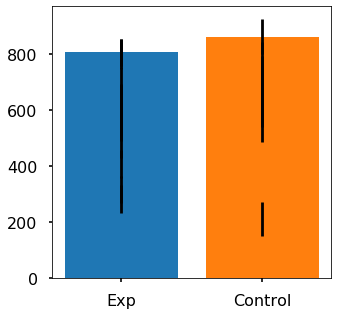

In [13]:
from scipy.stats import sem
## showing off SEM bars
f,ax = plt.subplots(figsize=(5,5))
ax.bar('Exp',grp_exp['BL'],yerr=sem(grp_exp['BL']))
ax.bar('Control',grp_control['BL'],yerr=sem(grp_control['BL']))

In [14]:
def plot_dists(grp1,grp2,col='BL',name1='Exp',name2='Control'):

    ## Defining "gridspec_kws" for plt.subplots()
    ## This will make our first plot 3 times wider than the second.
    gs_kw = dict(width_ratios=[3, 1])
    
    fig, axes = plt.subplots(figsize=(10,4),ncols=2,
                             gridspec_kw=gs_kw,constrained_layout=True)

    ## Defining the data 
    group1 = {'name':name1, 
             'data':grp1[col],
             'plot_specs':{
                 'hist_kws':dict(color='b', lw=2,ls='-'),
                 'kde_kws':dict(color='b',lw=1,ls='-'),
                 'label':f"{name1} (n={len(grp1[col])})"}
             }
    
    group2 = {'name':name2, 
             'data':grp2[col],
              'plot_specs':{
                  'hist_kws':dict(color='orange', lw=2,ls='-'),
                  'kde_kws':dict(color='orange',lw=1,ls='-'),
                   'label':f"{name2} (n={len(grp2[col])})"}
             }
    
    
    ax=axes[0]
    sns.distplot(group1['data'], **group1['plot_specs'],ax=axes[0])
    sns.distplot(group2['data'], **group2['plot_specs'],ax=axes[0])
    ax.legend()
    
    ax.set(ylabel="Density")
    ax.set(xlabel='Number of Licks')
    
    
    ax = axes[1]
    ax.bar(group1['name'],group1['data'].mean(),
          yerr=sem(group1['data']))

    ax.bar(group2['name'],group2['data'].mean(),
          yerr=sem(group2['data']))    
    
    return fig,ax

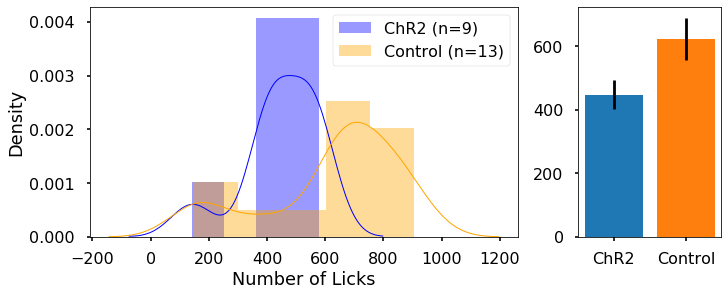

In [15]:
fig,ax = plot_dists(grp_control,grp_exp,col='R',name1='ChR2', name2='Control')

### Writing functions to test assumptions

In [16]:
import scipy.stats as stats
stats.normaltest(grp_control['BL'])

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=8.254723372420806, pvalue=0.016125366526865192)

In [17]:
def test_normality(grp_control,col='BL',alpha=0.05):
    import scipy.stats as stats
    stat,p =stats.normaltest(grp_control[col])
    if p<alpha:
        print(f"Normal test p value of {np.round(p,3)} is < {alpha}, therefore data is NOT normal.")
    else:
        print(f"Normal test p value of {np.round(p,3)} is > {alpha}, therefore data IS normal.")
    return p

def test_equal_variance(grp1,grp2, alpha=.05):
    stat,p = stats.levene(grp1,grp2)
    if p<alpha:
        print(f"Levene's test p value of {np.round(p,3)} is < {alpha}, therefore groups do NOT have equal variance.")
    else:
        print(f"Normal test p value of {np.round(p,3)} is > {alpha},  therefore groups DOES have equal variance.")
    return p



# def test_assumptions(*args, normal=True,equal_var=True):
#     pass

In [18]:
test_normality(grp_control,col='S'), test_normality(grp_exp,col='S');

Normal test p value of 0.783 is > 0.05, therefore data IS normal.
Normal test p value of 0.038 is < 0.05, therefore data is NOT normal.


//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


In [19]:
def Cohen_d(group1, group2):
    """
    Compute Cohen's d.
    
    Args:
        group1: Series or NumPy array
        group2: Series or NumPy array

    Returns:
        d (float): effect size statistic

    Interpretation:
    > Small effect = 0.2
    > Medium Effect = 0.5
    > Large Effect = 0.8
    """
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

## NOTE: Functions below pasted in due to time. Will construct smaller but similar functions together next class

In [20]:
def plot_statplot(df_means,grps=None,
                  group_col='Group',data_col='BL'):
    
    if grps is None:
        grps = df_means.groupby(group_col).groups

    ## Examine KDEs for BL
    fig= plt.figure(figsize=(10,6))
    axes=['','']
    # Define gridspec to create grid coordinates             
    gs = fig.add_gridspec(nrows=1,ncols=9)
    axes[0] = fig.add_subplot(gs[0,0:7])
    axes[1] = fig.add_subplot(gs[0,7:])

    data1=df_means.loc[grps['ChR2'],data_col]
    data2=df_means.loc[grps['Control'],data_col]
    
    group1 = {'name':'ChR2',
             'data':data1,#df_means.loc[grps['ChR2'],data_col],
             'n':len(data1)}
    plot1 = {'hist_kws':dict(color='blue',lw=2, ls='-')}#,bins='auto')}

    group2 = {'name':'Control',
             'data':data2,#df_means.loc[grps['Control'],data_col],
             'n':len(data2)}
    plot2 = {'hist_kws':dict(color='orange',lw=2, ls='-')}#,bins='auto')}
    
    ax = axes[0]
    label1= f"{group1['name']} n={group1['n']}"
    sns.distplot(group1['data'], label=label1,
                 ax=ax, hist_kws=plot1['hist_kws'])
    # ax.legend()

    label2= f"{group2['name']} n={group2['n']}"
    sns.distplot(group2['data'], label=label2,
                 ax=ax,hist_kws=plot2['hist_kws'])
    ax.legend()

    

    ax.axvline(group1['data'].mean(),color=plot1['hist_kws']['color'], ls='--')
    ax.axvline(group2['data'].mean(),color=plot2['hist_kws']['color'], ls='--')


    ax = axes[1]

    ax.bar(group1['name'],group1['data'].mean(),
          yerr=sem(group1['data']))

    ax.bar(group2['name'],group2['data'].mean(),
          yerr=sem(group2['data']))
    
    plt.suptitle(f"Phase = {data_col}",fontsize=20)
    
    return fig, ax

In [21]:
def test_assumptions(df_means,grps=None,
                     group_col='Group',
                     grp1='ChR2',
                     grp2='Control',
                     data_col='BL',
                    plot_data=False):
    """MASSIVE FUNCTION PASTED IN DUE TO VERY LATE STUDY GROUP
    WE WILL CONSTRUCT A BETTER/SIMPLER VERSION OF THIS TOGETHER IN NEXT STUDY GROUP."""
    
    if grps is None:
        grps = df_means.groupby(group_col).groups
        
        
    group1 = {'name':grp1,
              'data':df_means.loc[grps[grp1],data_col]}
    
    group2 = {'name':grp2,
              'data':df_means.loc[grps[grp2],data_col]}
    
    results = [['Col','Test','Group(s)','Stat','p','p<.05']]
    
    ## Normality testing
    stat,p = stats.normaltest(group1['data'])
    results.append([data_col,'Normality',group1['name'],
                  stat, p, p<.05])
    
    stat,p = stats.normaltest(group2['data'])    
    results.append([data_col,'Normality',group2['name'],
                  stat, p, p<.05])
    ## Homo. of Variance Testing
    stat,p = stats.levene(group1['data'],group2['data'])
    results.append([data_col,'Equal Variance','Both',
                  stat, p, p<.05])
    
    
    ## Parametric T-Test
    stat,p = stats.ttest_ind(group1['data'],group2['data'])
    results.append([data_col,'T-Test 2samp','Both',stat,p,p<.05])
    
    ## Non-Parametric MWU
    stat,p = stats.mannwhitneyu(group1['data'],group2['data'])
    results.append([data_col,'Mann Whitney U','Both',stat,p,p<.05])
    
    ## Effect size with Cohen's d
    d = Cohen_d(group1['data'],group2['data'])
    results.append([data_col, "Cohen's d", 'Both','','',d])
    
#     if plot_data:
#         plot_dists(grp, col=data_col)
    
    return pd.DataFrame(results[1:],columns=results[0])

res = test_assumptions(df_means)


------------------------------------------------------------------------------------------


,Col,Test,Group(s),Stat,p,p<.05
0,BL,Normality,ChR2,0.79,0.674,False
1,BL,Normality,Control,8.25,0.0161,True
2,BL,Equal Variance,Both,0.131,0.721,False
3,BL,T-Test 2samp,Both,-0.68,0.505,False
4,BL,Mann Whitney U,Both,47,0.231,False
5,BL,Cohen's d,Both,,,-0.295


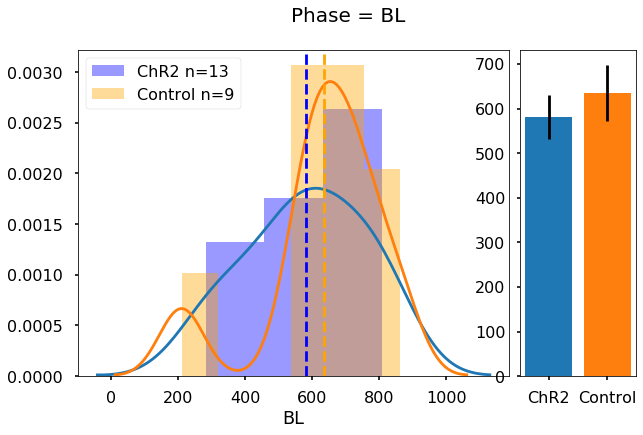

------------------------------------------------------------------------------------------


,Col,Test,Group(s),Stat,p,p<.05
0,S,Normality,ChR2,6.53,0.0381,True
1,S,Normality,Control,0.49,0.783,False
2,S,Equal Variance,Both,0.0723,0.791,False
3,S,T-Test 2samp,Both,0.252,0.804,False
4,S,Mann Whitney U,Both,51.5,0.332,False
5,S,Cohen's d,Both,,,0.109


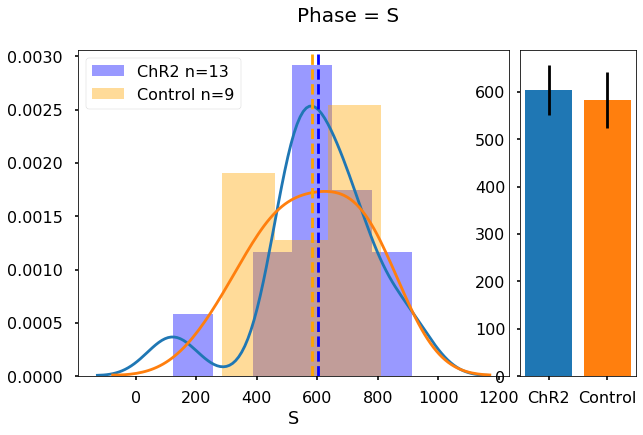

------------------------------------------------------------------------------------------


,Col,Test,Group(s),Stat,p,p<.05
0,PS,Normality,ChR2,3.78,0.151,False
1,PS,Normality,Control,2.28,0.321,False
2,PS,Equal Variance,Both,0.0517,0.822,False
3,PS,T-Test 2samp,Both,0.316,0.755,False
4,PS,Mann Whitney U,Both,55,0.421,False
5,PS,Cohen's d,Both,,,0.137


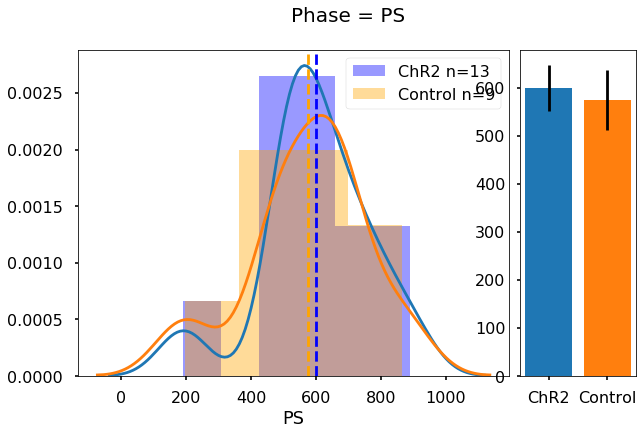

------------------------------------------------------------------------------------------


,Col,Test,Group(s),Stat,p,p<.05
0,R,Normality,ChR2,3.23,0.199,False
1,R,Normality,Control,7.01,0.0301,True
2,R,Equal Variance,Both,1.17,0.293,False
3,R,T-Test 2samp,Both,1.97,0.0632,False
4,R,Mann Whitney U,Both,24,0.0116,True
5,R,Cohen's d,Both,,,0.857


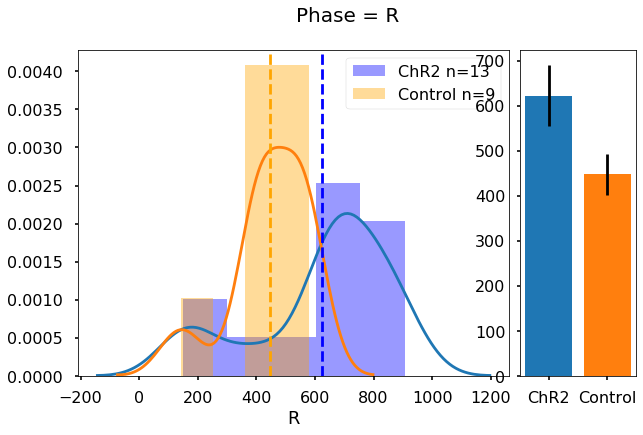

In [22]:
for phase in ['BL','S','PS','R']:
    print('---'*30)

    res = test_assumptions(df_means,data_col=phase)
    display(res)
    
    fig,ax = plot_statplot(df_means, data_col=phase)
    plt.show()

# fig,ax = plot_dists(grp_control,grp_exp,col='R',name1='ChR2 Mice', name2='Control Mice')


## CONCLUSION
- Running the correct test according to the assumptions of normality and equal variance will ensure you can get the correct test result.

- Notice how the last phase (R) did NOT come back as significant when we ran the t-test, but DID come back significant when we performed the Mann Whitney U instead. 



# APPENDIX

(https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html)

## Statistical Analysis Pipeline

1. **Test for Normality**
    - D'Agostino-Pearson's normality test<br>
    ```scipy.stats.normaltest```
    - Shapiro-Wilik Test<br>
    ```scipy.stats.shapiro```<br>
    
    
2. **Test for Homogeneity of Variance**

    - Levene's Test<br>
    ```scipy.stats.levene```


3. **Choose appropriate test based upon 1. and 2.** <br> 
    - T Test (1-sample)
        - `stats.ttest_1samp()`
    - T Test (2-sample)
        - `stats.ttest_ind()`
        - [docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
    - Welch's T-Test (2-sample)
        - `stats.ttest_ind(equal_var=False)`
        - [docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
        
    - Mann Whitney U
        - `stats.mannwhitneyu()`
        - [docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)
    - ANOVA 
        - `stats.f_oneway()`
        - [docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)
    - Tukey's
     - `statsmodels.stats.multicomp.pairwise_tukeyhsd`
     -[docs](https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html)
    

4. **Calculate effect size for significant results.**
    - Effect size: [cohen's d](https://stackoverflow.com/questions/21532471/how-to-calculate-cohens-d-in-python)
    - Interpretation:
        - Small effect = 0.2 ( cannot be seen by naked eye)
        - Medium effect  = 0.5
        - Large Effect = 0.8 (can be seen by naked eye)
        
5. **If significant, follow up with post-hoc tests (if have more than 2 groups)**
    - [Tukey's](https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html)


In [23]:
# def test_assumptions(df_means,grps=None,
#                      group_col='Group',
#                      grp1='ChR2',
#                      grp2='Control',
#                      data_col='BL'):
    
#     if grps is None:
#         grps = df_means.groupby(group_col).groups
        
        
#     group1 = {'name':grp1,
#               'data':df_means.loc[grps[grp1],data_col]}
    
#     group2 = {'name':grp2,
#               'data':df_means.loc[grps[grp2],data_col]}
    
#     results = [['Col','Test','Group(s)','Stat','p','p<.05']]
    
#     ## Normality testing
#     stat,p = stats.normaltest(group1['data'])
#     results.append([data_col,'Normality',group1['name'],
#                   stat, p, p<.05])
    
#     stat,p = stats.normaltest(group2['data'])    
#     results.append([data_col,'Normality',group2['name'],
#                   stat, p, p<.05])
#     ## Homo. of Variance Testing
#     stat,p = stats.levene(group1['data'],group2['data'])
#     results.append([data_col,'Equal Variance','Both',
#                   stat, p, p<.05])
    
#     ## Parametric T-Test
#     stat,p = stats.ttest_ind(group1['data'],group2['data'])
#     results.append([data_col,'T-Test 2samp','Both',stat,p,p<.05])
    
#     ## Non-Parametric MWU
#     stat,p = stats.mannwhitneyu(group1['data'],group2['data'])
#     results.append([data_col,'Mann Whitney U','Both',stat,p,p<.05])
    
#     ## Effect size with Cohen's d
#     d = Cohen_d(group1['data'],group2['data'])
#     results.append([data_col, "Cohen's d", 'Both','','',d])
    
#     return pd.DataFrame(results[1:],columns=results[0])

# test_assumptions(df_means)